In [1]:
import sys
sys.path.insert(0, "../..")

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from MPyDATA_examples.shallow_water.setup import Setup
from MPyDATA_examples.shallow_water.simulation import Simulation
from MPyDATA import Options

In [3]:
setup = Setup()
options = Options(n_iters = 2,
        infinite_gauge = True,
        divergent_flow = True,
        flux_corrected_transport = True
)

../..\MPyDATA_examples\shallow_water\setup.py:17: RuntimeWarning: invalid value encountered in sqrt
  self.tt = lambda x: 1 / 2 * (np.sqrt(x * (x - 1)) + np.log(np.sqrt(x - 1) + np.sqrt(x)))
C:\Users\Michael\anaconda3\lib\site-packages\pynverse\inverse.py:113: RuntimeWarning: invalid value encountered in sign
  trend = np.sign(func(ref2, *args) - func(ref1, *args))


# 1D case

## Formulation of the problem
basic assumptions:
   - horizontal scale is much larger than the vertical scale ($ u \approx u(x) $)
   - hydrostatic equillibrium
   - constant density

governing equations:
$$\partial_tH + \partial_x(uH) = 0 $$
$$ \partial_t(uH) + \partial_x(uuh) = - h \partial_xH $$

where $H$ is a normalised depth of the fluid layer and $u$ is a normalised velocity

first equation is just mass-continuity equation, to get second equation one may need momentum equation 

$$ \partial_t u + u \cdot \partial_x u = - \frac{1}{\rho} \partial_x p $$,
multiply it by $H$ and add $u$ multiplied by mass-continuity equation (taken in normalised units $g=1$), where p is the pressure in the constant-density fluid
$$ p = p_0 - \rho g z = p_0 + \rho g \cdot (H - z) $$


In [4]:
x = setup.grid
H0 = setup.H0(x)
H = lambda t: setup.analytic_H(x, t)
u = lambda t: setup.analytic_u(x,t)

## analytical solutions

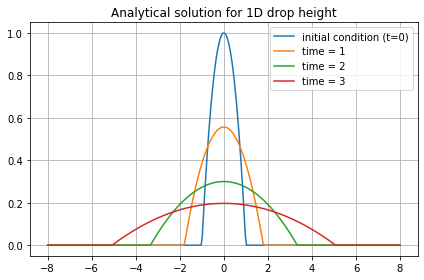

In [5]:
plt.title('Analytical solution for 1D drop height')
plt.plot(x, H0, label = 'initial condition (t=0)')
for nt in range(1,4):
    plt.plot(x, H(nt), label = f'time = {nt}')
plt.grid()
plt.legend(loc='best')
plt.tight_layout()

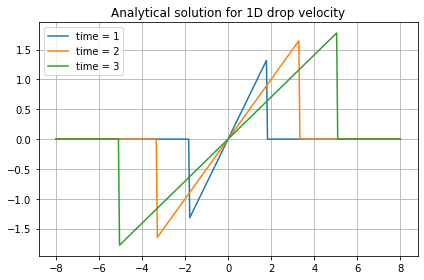

In [6]:
plt.title('Analytical solution for 1D drop velocity')
for nt in range(1,4):
    plt.plot(x, u(nt), label = f'time = {nt}')
plt.grid()
plt.legend(loc='best')
plt.tight_layout()

## numerical simulation using MPyDATA

In [7]:
def plot(simulation):
    psi_0 = simulation.state
    simulation.run()
    psi_T = simulation.state
    plt.plot(psi_0)
    plt.plot(psi_T)

In [8]:
simulation = Simulation(setup, options)

../..\MPyDATA_examples\shallow_water\setup.py:17: RuntimeWarning: invalid value encountered in sqrt
  self.tt = lambda x: 1 / 2 * (np.sqrt(x * (x - 1)) + np.log(np.sqrt(x - 1) + np.sqrt(x)))
C:\Users\Michael\anaconda3\lib\site-packages\pynverse\inverse.py:113: RuntimeWarning: invalid value encountered in sign
  trend = np.sign(func(ref2, *args) - func(ref1, *args))


# extension for 2D case

## Formulation of the problem

governing equations:
$$\partial_tH + \partial_x(uH) = 0 $$
$$ \partial_t(uH) + \partial_x(uuh) = - h \partial_xH $$